
# Dataset Overview
*Attribute Information:Season in which the analysis was performed winter spring summer fall Age at the time of analysis 18-36 Childish diseases (ie , chicken pox, measles, mumps, polio)yesnoAccident or serious trauma yes no Surgical intervention yes no High fevers in the last yearless than three months agomore than three months agonoFrequency of alcohol consumption several times a day every day several times a weekonce a weekhardly ever or neverSmoking habit never occasional daily Number of hours spent sitting per dayOur QuestionOutput: Diagnosis Normal (N) Altered (O)*


In [1]:
# Basic libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Analysis For Predictive Modeling

In [2]:
df=pd.read_csv('/kaggle/input/fertility-data-set/fertility.csv')

In [3]:
df.shape

(100, 10)

In [4]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [5]:
df.isnull().sum()

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

In [6]:
df.describe()

,Age,Number of hours spent sitting per day
count,100.000000,100.000000
mean,30.110000,10.800000
std,2.246861,33.616975
min,27.000000,1.000000
25%,28.000000,5.000000
50%,30.000000,7.000000
75%,32.000000,9.000000
max,36.000000,342.000000


In [7]:
count=df.Diagnosis.value_counts()
count

Diagnosis
Normal     88
Altered    12
Name: count, dtype: int64

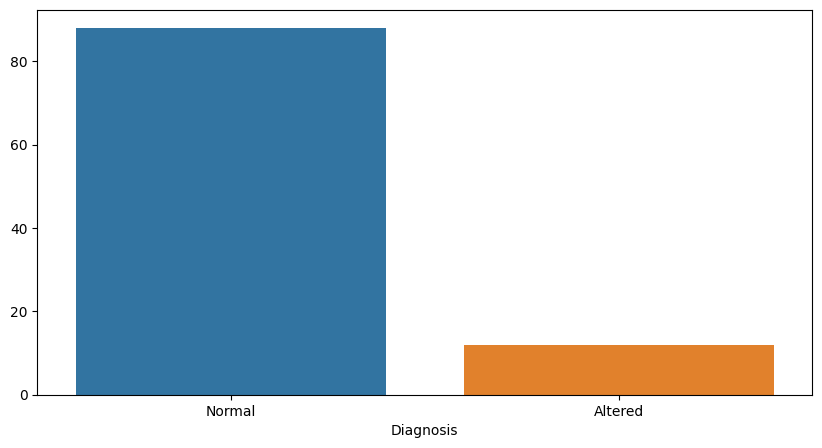

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x=count.index, y=count.values)
plt.show()

# Observation 1.
### > Firstly data is very limited (100 rows only).
### > Second thing is target variable has class imbalance problem i.e. If we create a predictive model it will be baised to single class i.e.Normal as out of 100 values only 12 are Altered and rest belongs to Normal. 
### > I still don't know how this dataset got a bronze medal as we can clearly see that it can't be use for predictive modeling.
### > But F**k it... let's visualize and analyse the data

In [9]:
df.Season.value_counts()

Season
spring    37
fall      31
winter    28
summer     4
Name: count, dtype: int64

<Axes: >

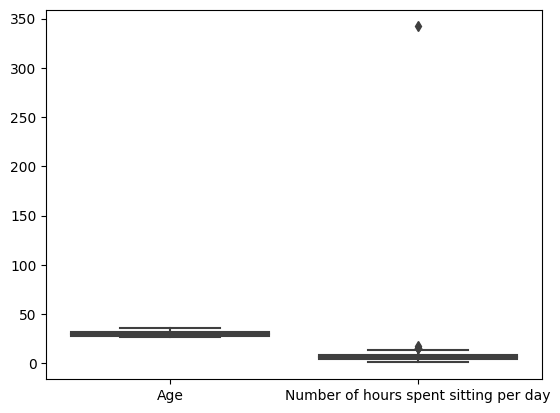

In [10]:
sns.boxplot(df)

In [11]:
print("Maximum ",df['Number of hours spent sitting per day'].max())
print("Mean ",df['Number of hours spent sitting per day'].mean())
print("Median ",df['Number of hours spent sitting per day'].median())
print("Mode ",df['Number of hours spent sitting per day'].mode())


Maximum  342
Mean  10.8
Median  7.0
Mode  0    5
Name: Number of hours spent sitting per day, dtype: int64


# Observation 2.
### ***Number of hours spent sitting per day*** column has 342 as a outlier.There is noticeable deviation among the mean, median, and mode values.

Season
spring    37
fall      31
winter    28
summer     4
Name: count, dtype: int64




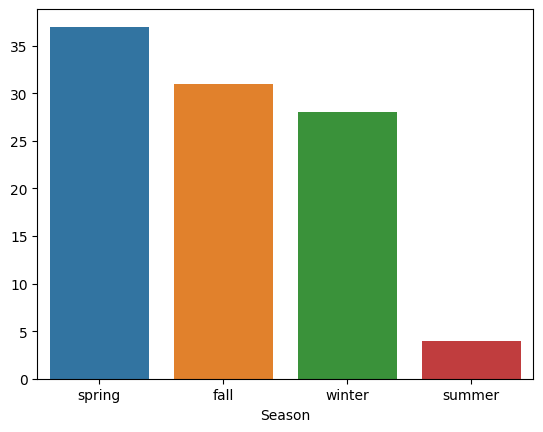

Age
28    28
30    27
32    17
27     7
33     7
29     5
35     4
36     2
31     2
34     1
Name: count, dtype: int64




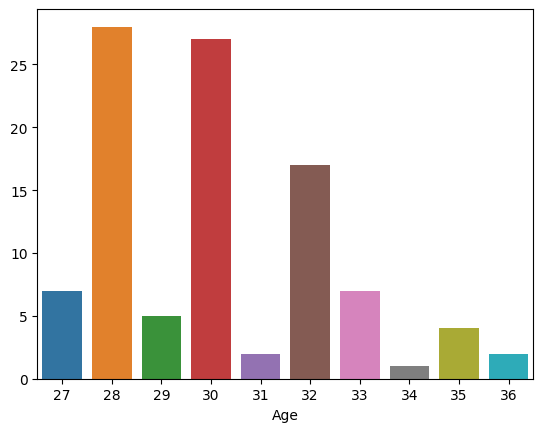

Childish diseases
yes    87
no     13
Name: count, dtype: int64




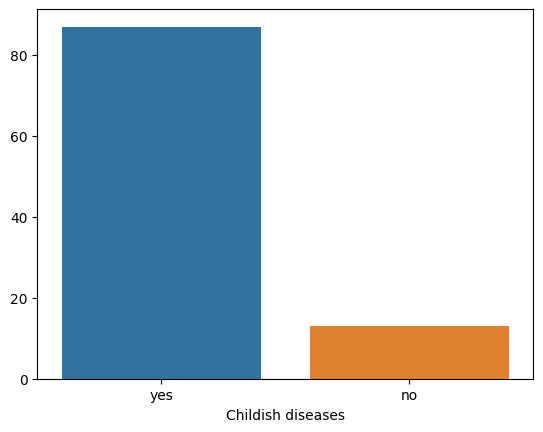

Accident or serious trauma
no     56
yes    44
Name: count, dtype: int64




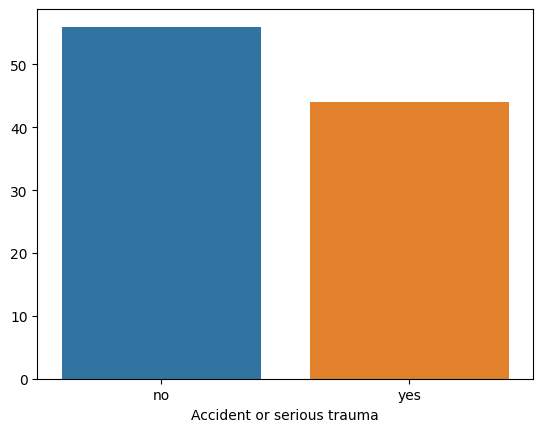

Surgical intervention
yes    51
no     49
Name: count, dtype: int64




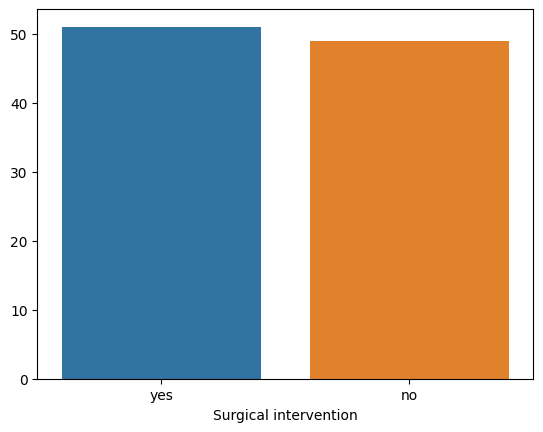

High fevers in the last year
more than 3 months ago    63
no                        28
less than 3 months ago     9
Name: count, dtype: int64




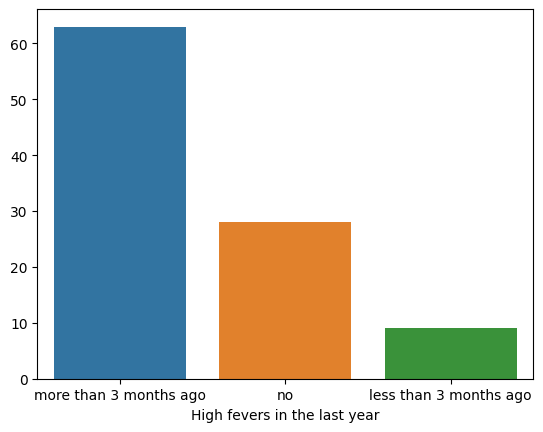

Frequency of alcohol consumption
hardly ever or never    40
once a week             39
several times a week    19
several times a day      1
every day                1
Name: count, dtype: int64




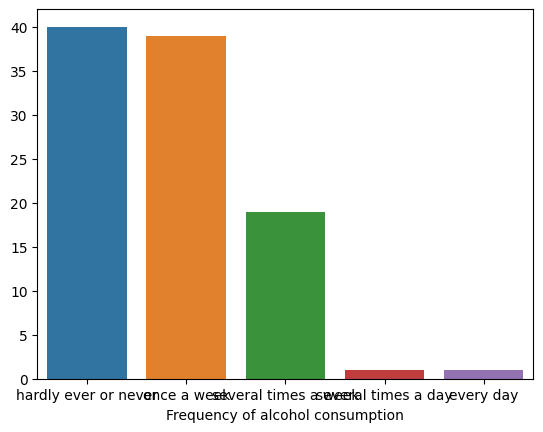

Smoking habit
never         56
occasional    23
daily         21
Name: count, dtype: int64




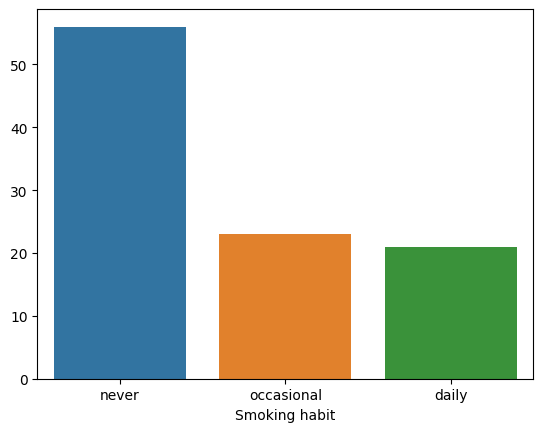

Number of hours spent sitting per day
5      17
9      16
7      13
6      11
8      10
11     10
3      10
16      3
14      3
10      2
1       2
2       1
342     1
18      1
Name: count, dtype: int64




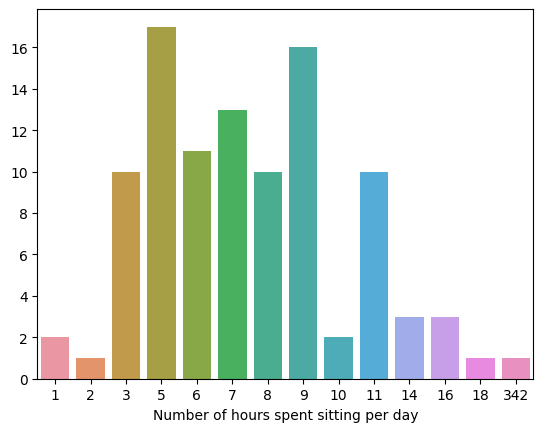

Diagnosis
Normal     88
Altered    12
Name: count, dtype: int64




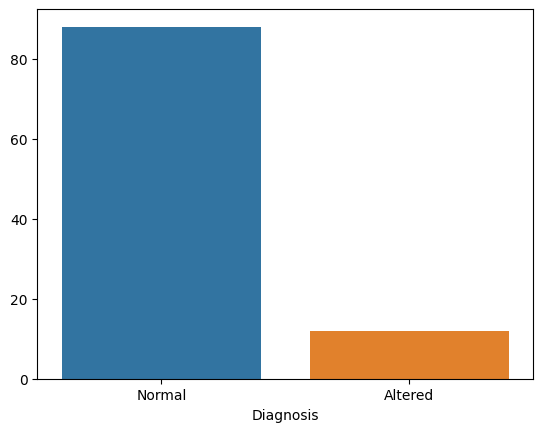

In [12]:
for i in df:
    x=df[i].value_counts()
    print(x)
    print("\n")
    sns.barplot(x=x.index,y=x.values)
    plt.show()
    

In [13]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# 1. Ordinal encode ordered columns
ordinal_cols = [
    'High fevers in the last year',
    'Frequency of alcohol consumption',
    'Smoking habit'
]

category_order = [
    ['no', 'more than 3 months ago', 'less than 3 months ago'],   
    ['hardly ever or never', 'once a week', 'several times a week', 'every day', 'several times a day'],
    ['never', 'occasional', 'daily']
]

ordinal_encoder = OrdinalEncoder(categories=category_order)
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

# 2. One-hot encode nominal columns
nominal_cols = [
    'Season',
    'Childish diseases',
    'Accident or serious trauma',
    'Surgical intervention'
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# 3. Label encode target 
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

df.head()

,Age,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis,Season_spring,Season_summer,Season_winter,Childish diseases_yes,Accident or serious trauma_yes,Surgical intervention_yes
0,30,1.0,1.0,1.0,16,1,1,0,0,0,1,1
1,35,1.0,1.0,2.0,6,0,1,0,0,1,0,1
2,27,1.0,0.0,0.0,9,1,1,0,0,1,0,0
3,32,1.0,0.0,0.0,7,1,1,0,0,0,1,1
4,30,1.0,1.0,0.0,9,0,1,0,0,1,1,0


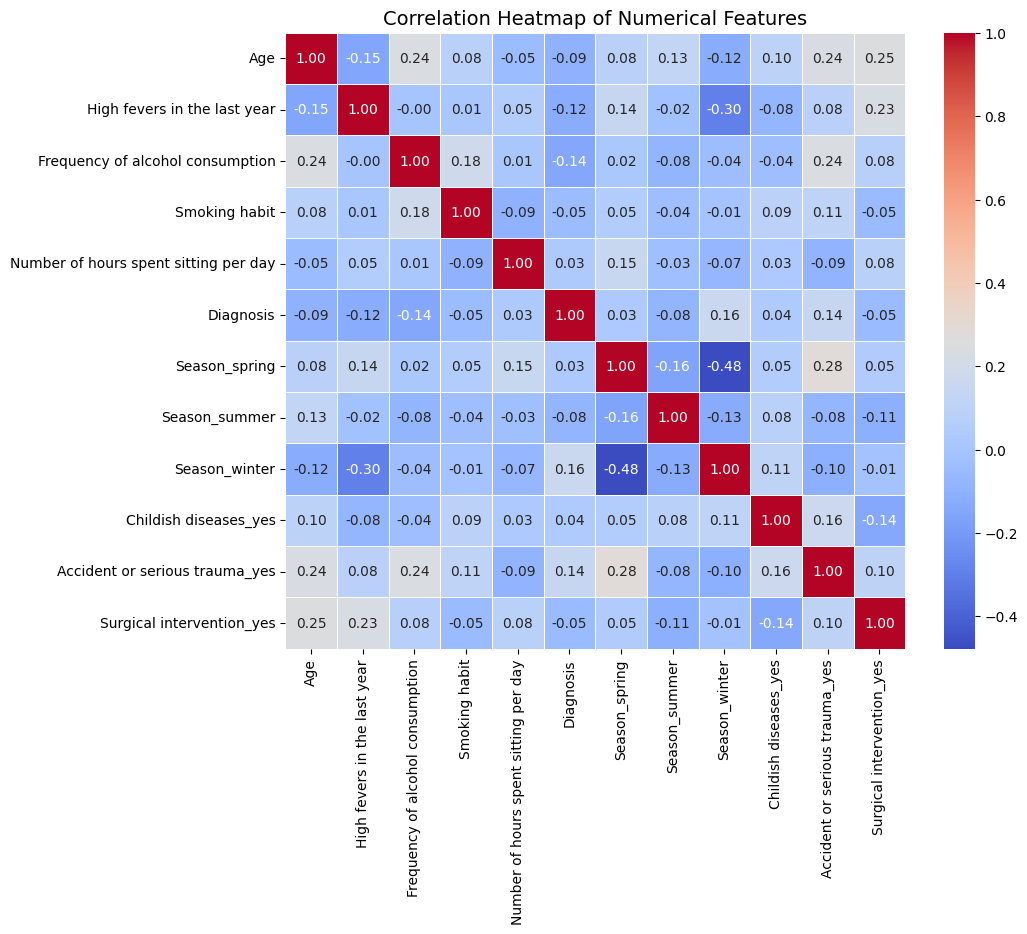

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

# Observation 3.
### ~ There is no such a strong correalation between the target variable and predicting variables.
### ~ It is weakly correlated with *Season_winter* and *Accident or serious trauma_yes*
#### Note : This data is not good for prediction...

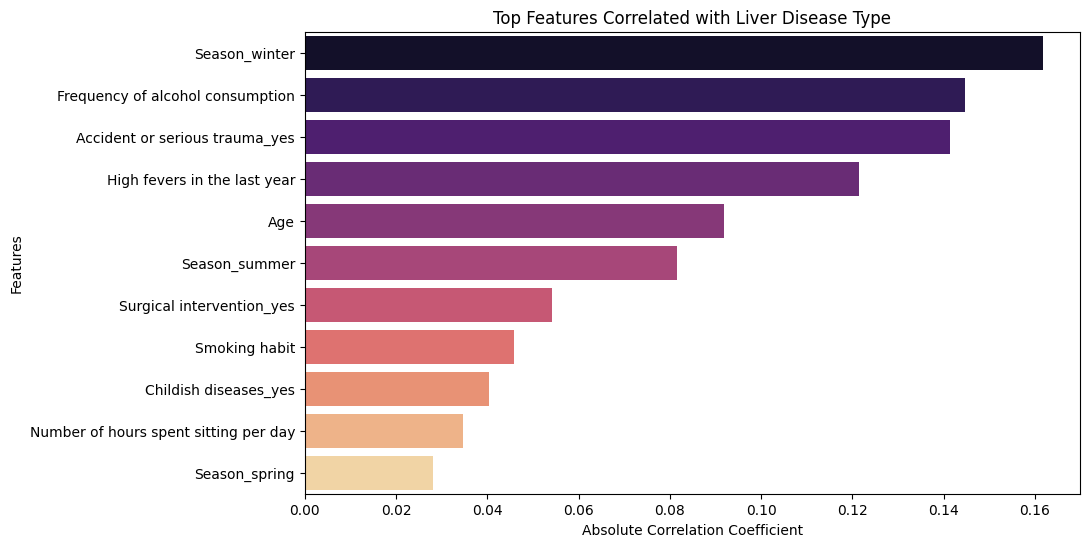

In [15]:
target_corr = df.corr()['Diagnosis'].abs().sort_values(ascending=False)[1:13]

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='magma')
plt.title('Top Features Correlated with Liver Disease Type')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numeric data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.91      0.95      0.93        22

    accuracy                           0.88        25
   macro avg       0.71      0.64      0.67        25
weighted avg       0.86      0.88      0.87        25



In [17]:
from xgboost import XGBClassifier

# Create XGBoost model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',
    num_class=len(y.unique())
)

# Train
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.91      0.91      0.91        22

    accuracy                           0.84        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.84      0.84      0.84        25



## ~ As i've already said above that data is not suitable for predictive modeling and specially it is baised to one class i.e. it will perform good for majority class and bad for minority class thats what we can see here...
## ~ So you may use *SMOTE* or *ADASYN* (Oversampling) but i think it will not work here as minority class data is limited and oversampling will not give desired results.
## ~ Also you may apply *Class Weights* to model but as minority class has very less reference (i.e.12) so still it may not perform well

#### So if you find some solution than do tell...
#### And feel free to use this notebook.